In [2]:
import fastbook
fastbook.setup_book()

In [3]:
import matplotlib
matplotlib.rc('image', cmap='Greys')

In [4]:
#from fastai.vision.all import *
from fastbook import *
from fastai.vision.all import URLs

In [5]:
from pathlib import Path

In [6]:
import torch.nn.functional as F

In [7]:
URLs.MNIST_SAMPLE

'https://s3.amazonaws.com/fast-ai-sample/mnist_sample.tgz'

In [8]:
path = untar_data(URLs.MNIST_SAMPLE)

In [9]:
Path.BASE_PATH = path

In [10]:
path.ls()

(#3) [Path('labels.csv'),Path('valid'),Path('train')]

In [11]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [12]:
from PIL import Image
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [13]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [14]:
from torch import tensor
tensor(array(im3))[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [15]:
im3_t = tensor(array(im3))
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [16]:
seven_tensors = [tensor(array(Image.open(o))) for o in sevens]
three_tensors = [tensor(array(Image.open(o))) for o in threes]
len(seven_tensors), len(three_tensors)

(6265, 6131)

<Axes: >

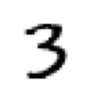

In [17]:
from fastai.vision.all import show_image
show_image(three_tensors[1])

In [18]:
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

<Axes: >

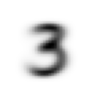

In [19]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

<Axes: >

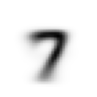

In [20]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

<Axes: >

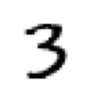

In [21]:
a_3 = stacked_threes[1]
show_image(a_3)

In [22]:
F.l1_loss(a_3, mean3), F.mse_loss(a_3, mean3).sqrt()

(tensor(0.1114), tensor(0.2021))

In [23]:
F.l1_loss(a_3, mean7), F.mse_loss(a_3, mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [24]:
valid_3_tens = torch.stack([tensor(array(Image.open(o))) for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(array(Image.open(o))) for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [25]:
def mnist_distance(a, b):
    return (a-b).abs().mean((-1,-2))

In [26]:
mnist_distance(a_3, mean3)

tensor(0.1114)

In [27]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1254, 0.1506, 0.1180,  ..., 0.1179, 0.1435, 0.1508]),
 torch.Size([1010]))

In [28]:
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)

In [29]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [30]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [31]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1-is_3(valid_7_tens).float()).mean()
accuracy_3s, accuracy_7s

(tensor(0.9168), tensor(0.9854))

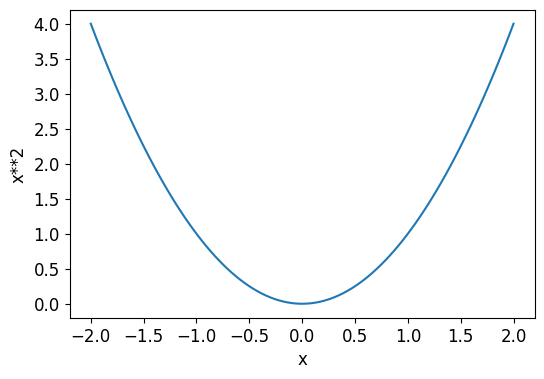

In [32]:
import matplotlib.pyplot as plt
def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, steps=100, figsize=(6,4)):
    x = torch.linspace(min,max, steps)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)
f = lambda x: x**2
plot_function(f, 'x', 'x**2')

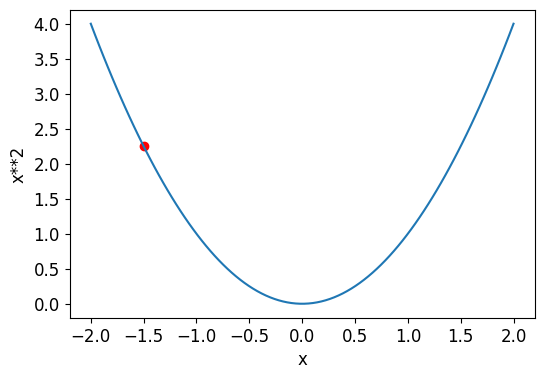

In [33]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

In [34]:
xt = tensor(3.).requires_grad_()

In [35]:
yt = f(xt)

In [36]:
yt.backward()

In [37]:
xt.grad

tensor(6.)

In [38]:
time = torch.arange(0, 20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

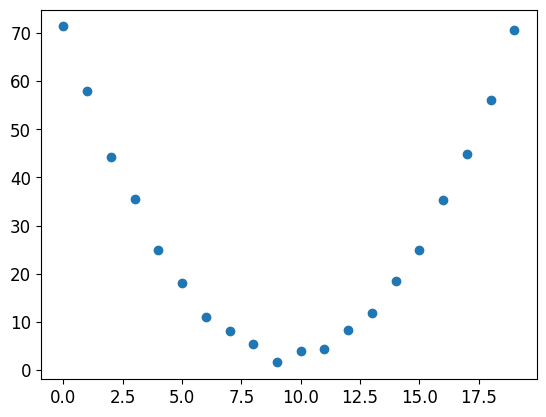

In [39]:
speed = torch.rand(20) * 3 + 0.75 * (time - 9.5)**2 + 1
plt.scatter(time, speed)

In [40]:
def f(t, params):
    a, b, c = params
    return a*(t**2) + (b*t) + c

In [41]:
def mse(preds, targets):
    return ((preds-targets)**2).mean()

In [42]:
params = torch.randn(3).requires_grad_()

In [43]:
orig_params = params.clone()

In [44]:
preds = f(time, params)

In [45]:
def show_preds(preds, ax=None):
    if ax is None: ax = plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300, 100)

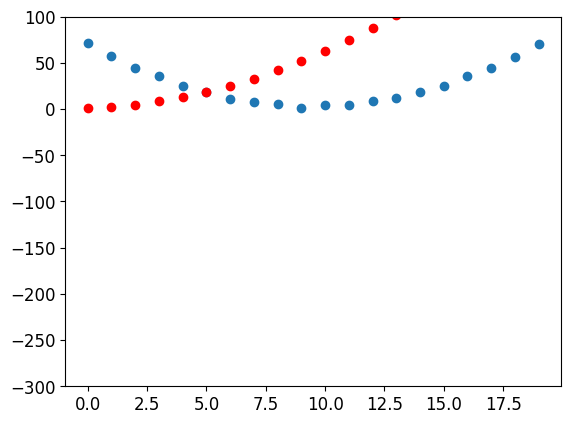

In [46]:
show_preds(preds)

In [47]:
loss = mse(preds, speed)
loss

tensor(6271.1558, grad_fn=<MeanBackward0>)

In [48]:
loss.backward()
params.grad

tensor([25124.4727,  1624.3723,    94.0216])

In [49]:
params.grad * 1e-5

tensor([0.2512, 0.0162, 0.0009])

In [50]:
params

tensor([0.5349, 0.8094, 1.1103], requires_grad=True)

In [51]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [52]:
preds = f(time, params)
mse(preds, speed)

tensor(1722.9987, grad_fn=<MeanBackward0>)

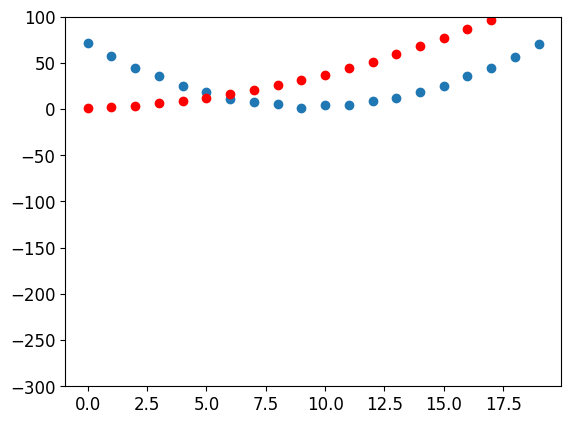

In [53]:
show_preds(preds)

In [54]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: 
        print(loss.item())
    return preds

In [55]:
for i in range(10):
    apply_step(params)

1722.9986572265625
862.3447265625
699.4794311523438
668.6570434570312
662.8212890625
661.7135620117188
661.5006103515625
661.4569091796875
661.4454345703125
661.4398803710938


In [56]:
params = orig_params.detach().requires_grad_()

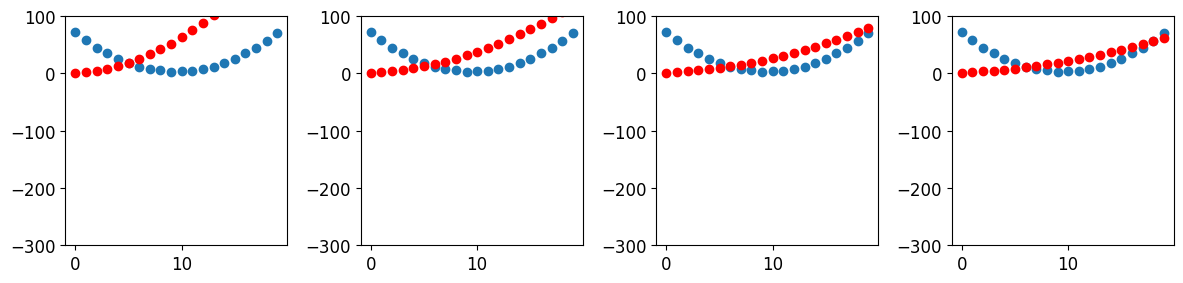

In [57]:
_, axs = plt.subplots(1, 4, figsize=(12, 3))
for ax in axs:
    show_preds(apply_step(params, False), ax)
plt.tight_layout()

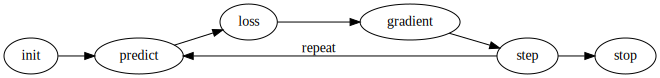

In [58]:
#hide_input
#id gradient_descent
#caption The gradient descent process
#alt Graph showing the steps for Gradient Descent
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

In [59]:
# MNIST

In [60]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [61]:
train_x.shape

torch.Size([12396, 784])

In [62]:
train_y = tensor([1] * len(threes) + [0] * len(sevens)).unsqueeze(1)
train_y.shape

torch.Size([12396, 1])

In [63]:
dset = list(zip(train_x, train_y))
x, y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [64]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1] * len(valid_3_tens) + [0] * len(valid_7_tens)).unsqueeze(1)
valid_dest = list(zip(valid_x, valid_y))

In [65]:
def init_params(size, std=1.0):
    return (torch.randn(size) * std).requires_grad_()

In [66]:
weights = init_params((28*28, 1))
weights[:5]

tensor([[-1.1109],
        [ 0.0915],
        [-2.3169],
        [-0.2168],
        [-1.3847]], grad_fn=<SliceBackward0>)

In [67]:
bias = init_params(1)

In [68]:
(train_x[0] * weights.T).sum() + bias

tensor([6.0210], grad_fn=<AddBackward0>)

In [69]:
# def linear1(xb):
#     return xb@weights + bias
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[  6.0209],
        [ -7.9800],
        [-11.1979],
        ...,
        [-11.9900],
        [  7.9160],
        [ -1.7560]], grad_fn=<AddBackward0>)

In [70]:
corrects = (preds > 0.0).float() == train_y
corrects

tensor([[ True],
        [False],
        [False],
        ...,
        [ True],
        [False],
        [ True]])

In [71]:
corrects.float().mean().item()

0.3568086624145508

In [72]:
with torch.no_grad():
    weights[0] *= 1.0001

In [73]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [74]:
trgts  = tensor([1,0,1])
prds   = tensor([0.9, 0.4, 0.2])
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [75]:
mnist_loss(prds, trgts)

tensor(0.4333)

In [76]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

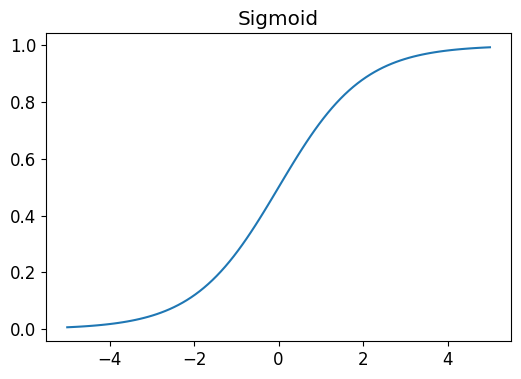

In [77]:
plot_function(torch.sigmoid, title='Sigmoid', min=-5, max=5)

In [78]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [79]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [80]:
weights = init_params((28*28,1))
bias = init_params(1)

In [81]:
dl = DataLoader(dset, batch_size=256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [82]:
valid_dset = valid_dest
valid_dl = DataLoader(valid_dset, batch_size=256)

In [83]:
bz1, bz2 = 5, 10
batch = train_x[bz1:bz2]
valid_batch = train_y[bz1:bz2]
#batch.shape, batch, valid_batch, valid_batch.shape

In [84]:
preds = linear1(batch)
preds

tensor([[15.7885],
        [-4.8862],
        [22.9951],
        [ 2.7429],
        [11.5164]], grad_fn=<AddBackward0>)

In [85]:
loss = mnist_loss(preds, valid_batch)
loss

tensor(0.2106, grad_fn=<MeanBackward0>)

In [86]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-0.0022), tensor([-0.0129]))

In [87]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [88]:
calc_grad(train_x[:4], train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0109), tensor([-0.0742]))

In [89]:
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

In [90]:
def train_epoch(model, lr, pararms):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad * lr
            p.grad.zero_()

In [91]:
preds

tensor([[15.7885],
        [-4.8862],
        [22.9951],
        [ 2.7429],
        [11.5164]], grad_fn=<AddBackward0>)

In [92]:
(preds > 0.0).float() == train_y[:5]

tensor([[ True],
        [False],
        [ True],
        [ True],
        [ True]])

In [93]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds > 0.5) == yb
    return correct.float().mean()

In [94]:
batch_accuracy(linear1(train_x[:4]), train_y[:4])

tensor(0.7500)

In [95]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [96]:
validate_epoch(linear1)

0.3512

In [97]:
lr = 1.
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.4902

In [98]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.4927 0.4946 0.4971 0.5025 0.6549 0.7509 0.9091 0.9413 0.954 0.9579 0.9609 0.9633 0.9667 0.9677 0.9687 0.9706 0.9716 0.9726 0.9731 0.9736 

# Optimizer

In [99]:
linear_model = nn.Linear(28*28, 1)

In [100]:
w, b = linear_model.parameters()

In [101]:
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [102]:
class BasicOptim:
    def __init__(self, params, lr):
        self.params, self.lr = list(params), lr

    def step(self, *args, **kwargs):
        for p in self.params:
            p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params:
            p.grad = None

In [103]:
opt = BasicOptim(linear_model.parameters(), lr)

In [104]:
def train_epoch(model):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [105]:
validate_epoch(linear_model)

0.5878

In [106]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [107]:
train_model(linear_model, 20)

0.4932 0.7734 0.8559 0.9175 0.935 0.9487 0.956 0.9638 0.9658 0.9677 0.9697 0.9726 0.9736 0.9751 0.9755 0.977 0.9775 0.978 0.9785 0.9785 

In [108]:
linear_model = nn.Linear(28*28, 1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.8559 0.8379 0.9121 0.9326 0.9467 0.956 0.9633 0.9653 0.9668 0.9692 0.9712 0.9731 0.9741 0.976 0.976 0.9775 0.9785 0.9785 0.979 

In [109]:
dls = DataLoaders(dl, valid_dl)

In [110]:
learn = Learner(dls, nn.Linear(28*28, 1), opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [111]:
learn.fit(20, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636877,0.503603,0.495584,00:00
1,0.585546,0.128285,0.914622,00:00
2,0.212065,0.214228,0.798822,00:00
3,0.091537,0.116088,0.903827,00:00
4,0.047227,0.082336,0.930324,00:00
5,0.030045,0.065007,0.945044,00:00
6,0.023047,0.054450,0.954367,00:00
7,0.019983,0.047521,0.960255,00:00
8,0.018463,0.042692,0.964671,00:00
9,0.017569,0.039153,0.966634,00:00


In [112]:
def simple_net(xb):
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

In [113]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

In [114]:
w1.shape

torch.Size([784, 30])

In [115]:
simple_net = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(),
    nn.Linear(30, 1)
)

In [116]:
simple_net

Sequential(
  (0): Linear(in_features=784, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=1, bias=True)
)

In [117]:
learn = Learner(dls, simple_net, opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [118]:
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.270501,0.415193,0.504416,00:00
1,0.130624,0.218204,0.818940,00:00
2,0.074510,0.112016,0.917566,00:00
3,0.050401,0.076601,0.942591,00:00
4,0.039023,0.060131,0.956820,00:00
5,0.033071,0.050772,0.964671,00:00
6,0.029560,0.044829,0.966634,00:00
7,0.027227,0.040753,0.967615,00:00
8,0.025521,0.037778,0.969087,00:00
9,0.024189,0.035502,0.971541,00:00


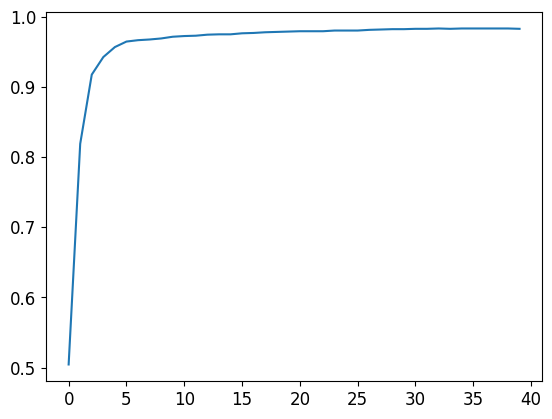

In [119]:
plt.plot(L(learn.recorder.values).itemgot(2))

In [120]:
learn.recorder.values[-1][2]

0.982826292514801

In [332]:
dls = ImageDataLoaders.from_folder(path)
learn = vision_learner(dls, resnet18, pretrained=False, loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.093631,0.019640,0.997056,00:12


In [138]:
dls.train_ds[0][0].shape, dls.train_ds[0][0].dtype

(torch.Size([784]), torch.float32)

In [1]:
learn.dls.vocab

NameError: name 'learn' is not defined

In [ ]:
learn